In [1]:
from nepc import nepc
from nepc.util import config
from nepc.util import parser
from nepc.util import plotter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_colwidth', 120)

In [3]:
cnx, cursor = nepc.connect(local=True)

In [4]:
NEPC_HOME = config.nepc_home()
outdir = NEPC_HOME + "/models/angus/"
mysql_dir = NEPC_HOME + "/mysql/"

In [5]:
species = nepc.table_as_df(cursor, "species")
processes = nepc.table_as_df(cursor, "processes")
states = nepc.table_as_df(cursor, "states")\

According to Angus, the species in the following table are included in his gas-chemistry model.

Figure 1.
<img src="fig/bl_species.png" width=800>

## Cross sections for thermal processes with atomic species

### e$^-$ impact excitation of N

Angus states that cross sections
for transitions between *all* electronic states of neutral
atomic nitrogen (N) are taken from the recent B–spline, R–Matrix
calculations by Wang et al. If we were to track all possible electronic transitions between the 21 states of N listed in Figure 1, we would have $20 + 19 + 18 + \dots + 1 = 210$ processes for N excitations alone!

$S_n = \frac{n(a_1 + a_2)}{2}$ 

where $n = 20$, $a_1 = 1$, and $a_2 = 20$. So,

$S_{20} = \frac{20 (1 + 20)}{2} = 210$

It may turn out that we need to carry that many processes (or more), but as a first attempt, we will screen for those cross sections with a minimum peak in the cross section data.

In [6]:
sigma_cutoff = 1E-21 # m^2

In [7]:
state = []
state.append(states[2][1])
state[0]

'N_2s22p3_4So'

In [8]:
cs_subset = []
cs_subset.append(nepc.cs_subset(cursor, specie="N", process="excitation", ref='wang2014',
                                 lhsA=state[0], sigma_cutoff=sigma_cutoff))

In [9]:
nepc.model_summary_df(cs_subset[0])

,cs_id,specie,process,reaction,E_lower,E_upper,sigma_max,lpu,upu
0,202,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^3 {}^2D^o$) + e$^-$,2.39,135,8.84825e-21,None,None
1,181,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^3 {}^2P^o$) + e$^-$,3.57,135,5.29548e-21,None,None
2,268,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^4P$) + e$^-$,10.42,135,4.22767e-21,None,None
3,225,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^4$ ${}^4P$) + e$^-$,10.95,135,4.01937e-21,None,None


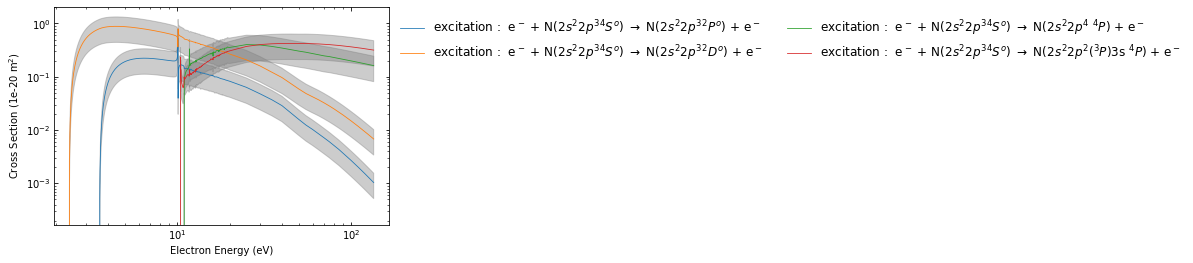

In [10]:
fig, ax = plt.subplots()
plotter.plot_nepc_model(ax, cs_subset[0], 1E-20,
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 10, 'right': 50.0}, 
                        ylog=True, xlog=True, max_plots=8, width=8, height=4) 

In [11]:
state.append(states[2][2])
state[1]

'N_2s22p3_2Do'

In [12]:
cs_subset.append(nepc.cs_subset(cursor, specie="N", process="excitation", ref='wang2014', 
                                lhsA=state[1], sigma_cutoff=sigma_cutoff))

In [13]:
nepc.model_summary_df(cs_subset[1])

,cs_id,specie,process,reaction,E_lower,E_upper,sigma_max,lpu,upu
0,366,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^3 {}^2P^o$) + e$^-$,3.57,135,7.94775e-21,None,None
1,406,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^4P$) + e$^-$,10.42,135,2.06001e-21,None,None
2,286,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^2P$) + e$^-$,10.77,135,1.25547e-21,None,None
3,370,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^4$ ${}^4P$) + e$^-$,10.95,135,2.39499e-21,None,None
4,312,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^2$(${}^1D$)3s ${}^2D$) + e$^-$,12.37,135,1.05484e-21,None,None


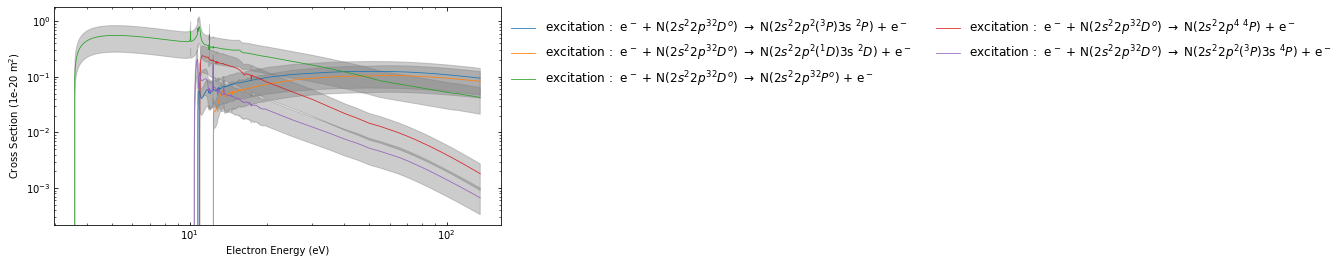

In [14]:
fig, ax = plt.subplots()
plotter.plot_nepc_model(ax, cs_subset[1], 1E-20,
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 10, 'right': 50.0}, 
                        ylog=True, xlog=True, max_plots=8, width=8, height=4) 

In [15]:
state.append(states[2][3])
state[2]

'N_2s22p3_2Po'

In [16]:
cs_subset.append(nepc.cs_subset(cursor, specie="N", process="excitation", ref='wang2014', 
                                lhsA=state[2], sigma_cutoff=sigma_cutoff))

In [17]:
nepc.model_summary_df(cs_subset[2])

,cs_id,specie,process,reaction,E_lower,E_upper,sigma_max,lpu,upu
0,150,N,excitation,e$^-$ + N($2s^22p^3 {}^2P^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^4P$) + e$^-$,10.42,135,2.06405e-21,None,None
1,74,N,excitation,e$^-$ + N($2s^22p^3 {}^2P^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^2P$) + e$^-$,10.77,135,1.67604e-21,None,None
2,368,N,excitation,e$^-$ + N($2s^22p^3 {}^2P^o$) $\rightarrow$ N($2s^22p^4$ ${}^4P$) + e$^-$,10.95,135,2.50146e-21,None,None


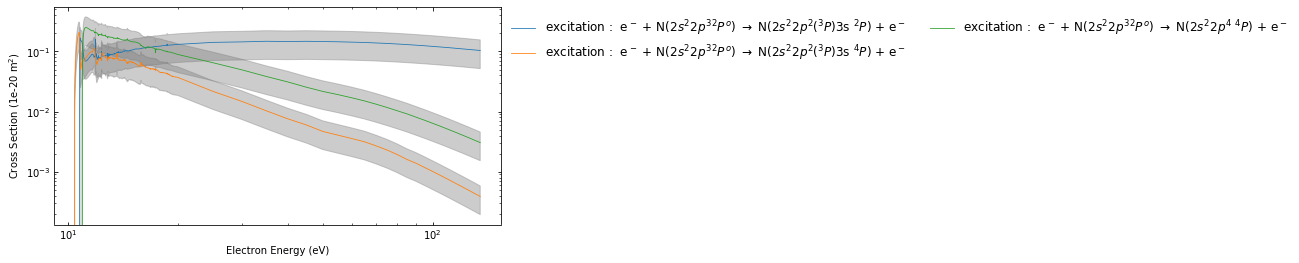

In [18]:
fig, ax = plt.subplots()
plotter.plot_nepc_model(ax, cs_subset[2], 1E-20,
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 10, 'right': 50.0}, 
                        ylog=True, xlog=True, max_plots=8, width=8, height=4) 

In [19]:
state.append(states[2][4])
state[3]

'N_2s22p2_3P_3s_4P'

In [20]:
cs_subset.append(nepc.cs_subset(cursor, specie="N", process="excitation", ref='wang2014', 
                                lhsA=state[3], sigma_cutoff=sigma_cutoff))

In [21]:
nepc.model_summary_df(cs_subset[3])

,cs_id,specie,process,reaction,E_lower,E_upper,sigma_max,lpu,upu
0,317,N,excitation,e$^-$ + N($2s^22p^2$(${}^3P$)3s ${}^4P$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^2P$) + e$^-$,10.77,135,2.87819e-19,None,None
1,263,N,excitation,e$^-$ + N($2s^22p^2$(${}^3P$)3s ${}^4P$) $\rightarrow$ N($2s^22p^4$ ${}^4P$) + e$^-$,10.95,135,2.26197e-19,None,None
2,410,N,excitation,e$^-$ + N($2s^22p^2$(${}^3P$)3s ${}^4P$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3p ${}^2S^o$) + e$^-$,11.62,135,1.54081e-20,None,None
3,85,N,excitation,e$^-$ + N($2s^22p^2$(${}^3P$)3s ${}^4P$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3p ${}^4D^o$) + e$^-$,11.79,135,3.51594e-19,None,None
4,119,N,excitation,e$^-$ + N($2s^22p^2$(${}^3P$)3s ${}^4P$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3p ${}^4P^o$) + e$^-$,11.87,135,2.47781e-19,None,None
5,375,N,excitation,e$^-$ + N($2s^22p^2$(${}^3P$)3s ${}^4P$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3p ${}^4S^o$) + e$^-$,12,135,4.75554e-20,None,None
6,134,N,excitation,e$^-$ + N($2s^22p^2$(${}^3P$)3s ${}^4P$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3p ${}^2D^o$) + e$^-$,12.03,135,3.5519e-20,None,None
7,51,N,excitation,e$^-$ + N($2s^22p^2$(${}^3P$)3s ${}^4P$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3p ${}^2P^o$) + e$^-$,12.15,135,2.11887e-20,None,None
8,306,N,excitation,e$^-$ + N($2s^22p^2$(${}^3P$)3s ${}^4P$) $\rightarrow$ N($2s^22p^2$(${}^1D$)3s ${}^2D$) + e$^-$,12.37,135,1.46197e-20,None,None
9,221,N,excitation,e$^-$ + N($2s^22p^2$(${}^3P$)3s ${}^4P$) $\rightarrow$ N($2s^22p^2$(${}^3P$)4s ${}^4P$) + e$^-$,12.85,135,2.54592e-20,None,None


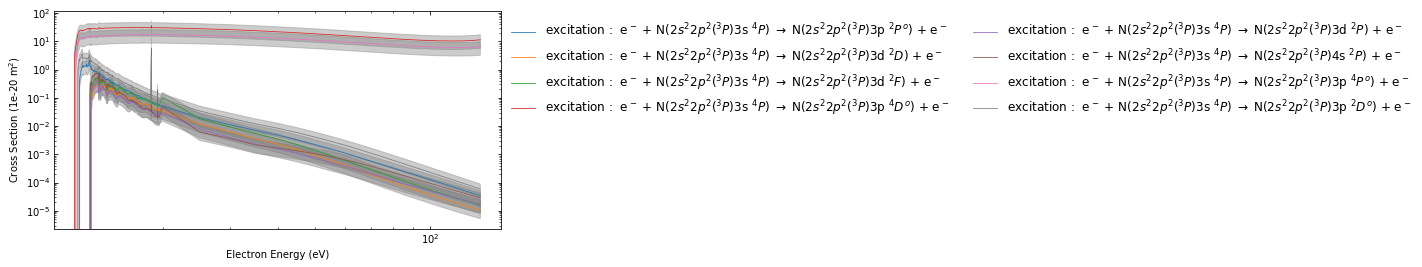

In [22]:
fig, ax = plt.subplots()
plotter.plot_nepc_model(ax, cs_subset[3], 1E-20,
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 10, 'right': 50.0}, 
                        ylog=True, xlog=True, max_plots=8, width=8, height=4) 

In [23]:
cs_N_excitation = [item for sublist in cs_subset for item in sublist]

In [24]:
nepc.model_summary_df(cs_N_excitation)

,cs_id,specie,process,reaction,E_lower,E_upper,sigma_max,lpu,upu
0,202,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^3 {}^2D^o$) + e$^-$,2.39,135,8.84825e-21,None,None
1,366,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^3 {}^2P^o$) + e$^-$,3.57,135,7.94775e-21,None,None
2,181,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^3 {}^2P^o$) + e$^-$,3.57,135,5.29548e-21,None,None
3,406,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^4P$) + e$^-$,10.42,135,2.06001e-21,None,None
4,150,N,excitation,e$^-$ + N($2s^22p^3 {}^2P^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^4P$) + e$^-$,10.42,135,2.06405e-21,None,None
5,268,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^4P$) + e$^-$,10.42,135,4.22767e-21,None,None
6,317,N,excitation,e$^-$ + N($2s^22p^2$(${}^3P$)3s ${}^4P$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^2P$) + e$^-$,10.77,135,2.87819e-19,None,None
7,286,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^2P$) + e$^-$,10.77,135,1.25547e-21,None,None
8,74,N,excitation,e$^-$ + N($2s^22p^3 {}^2P^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^2P$) + e$^-$,10.77,135,1.67604e-21,None,None
9,263,N,excitation,e$^-$ + N($2s^22p^2$(${}^3P$)3s ${}^4P$) $\rightarrow$ N($2s^22p^4$ ${}^4P$) + e$^-$,10.95,135,2.26197e-19,None,None
